In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display

In [18]:
combined_df = pd.read_csv('C:/Users/DELL G7/Pictures/Camera Roll/projects/newdepression/combined_data.csv')

scores_df = pd.read_csv('C:/Users/DELL G7/Pictures/Camera Roll/projects/newdepression/data/scores.csv')

In [5]:
df_list=[combined_df, scores_df]

In [11]:
for df in df_list:
    display(df.head())
    print('_' * 50)
    display(df.isnull().sum())

,timestamp,activity,status,person
0,2003-03-18 15:00:00,60,nondepressed,control_1
1,2003-03-18 15:01:00,0,nondepressed,control_1
2,2003-03-18 15:02:00,264,nondepressed,control_1
3,2003-03-18 15:03:00,662,nondepressed,control_1
4,2003-03-18 15:04:00,293,nondepressed,control_1


__________________________________________________


timestamp    0
activity     0
status       0
person       0
dtype: int64

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


__________________________________________________


number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

NaN    32
2.0    15
1.0     7
3.0     1
Name: afftype, dtype: int64


NaN    35
2.0    19
1.0     1
Name: melanch, dtype: int64


NaN    32
2.0    18
1.0     5
Name: inpatient, dtype: int64


NaN    32
2.0    12
1.0    11
Name: marriage, dtype: int64


NaN    32
2.0    20
1.0     3
Name: work, dtype: int64




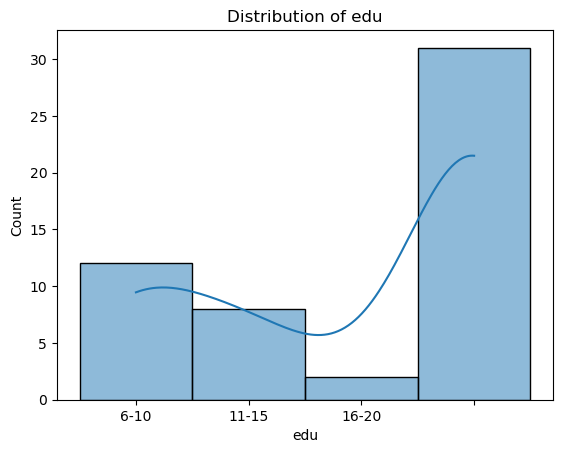

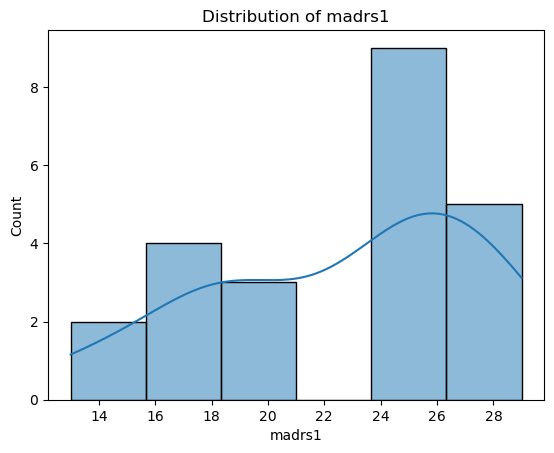

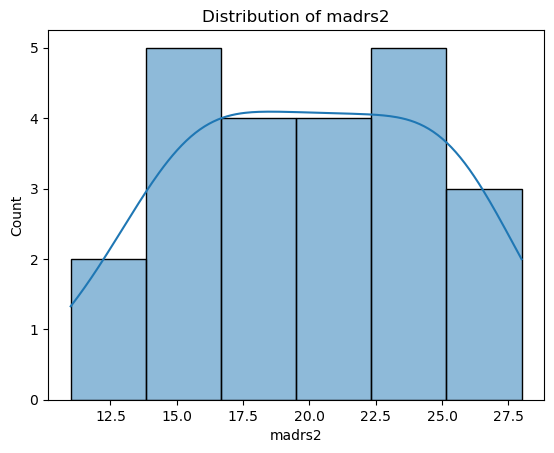

In [19]:
# Checking the distribution of categorical columns
import matplotlib.pyplot as plt

categorical_columns = ['afftype', 'melanch', 'inpatient', 'marriage', 'work']
for col in categorical_columns:
    print(scores_df[col].value_counts(dropna=False))
    print("\n")

# Checking the distribution of numerical columns
numerical_columns = ['edu', 'madrs1', 'madrs2']
for col in numerical_columns:
    sns.histplot(scores_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [20]:
for col in numerical_columns:
    print(f"{col}: {scores_df[col].dtype}")


edu: object
madrs1: float64
madrs2: float64


In [21]:
# Assuming 'edu' was the problematic column
print(scores_df['edu'].unique())


['6-10' '11-15' '16-20' ' ' nan]


In [22]:
# Convert range values to their mean
def convert_range_to_mean(value):
    if '-' in str(value):
        low, high = map(int, value.split('-'))
        return (low + high) / 2
    elif value == ' ':
        return float('nan')
    else:
        return value

scores_df['edu'] = scores_df['edu'].apply(convert_range_to_mean).astype(float)

# Now, you can impute NaNs with the mean or median
mean_val = scores_df['edu'].mean()
scores_df['edu'].fillna(mean_val, inplace=True)


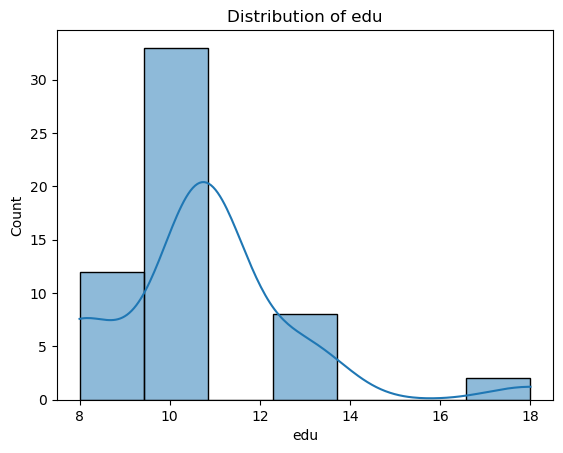

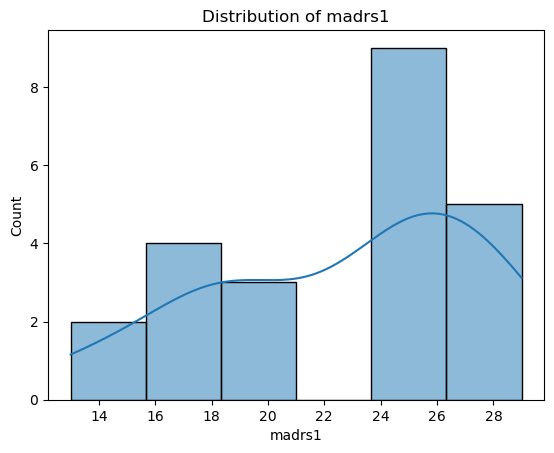

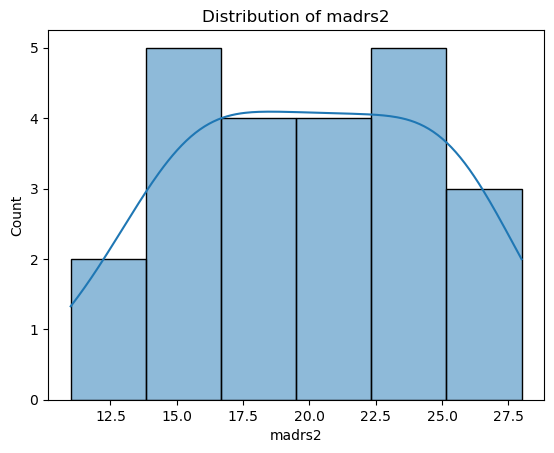

In [23]:
for col in numerical_columns:
    sns.histplot(scores_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


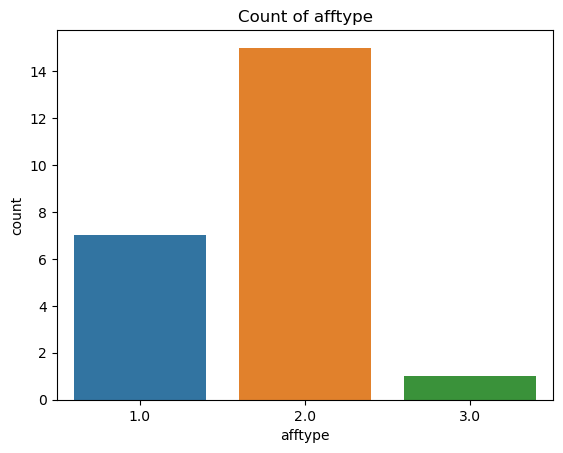

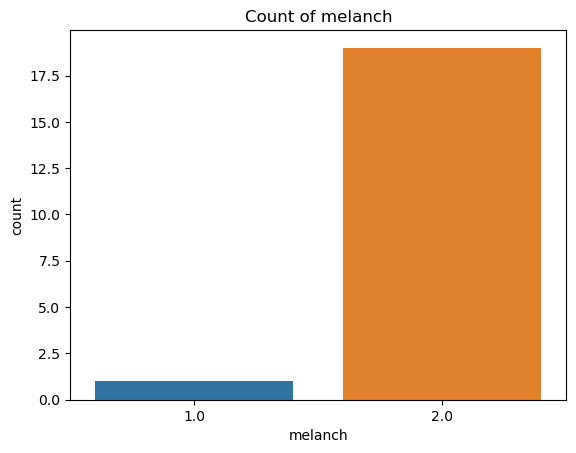

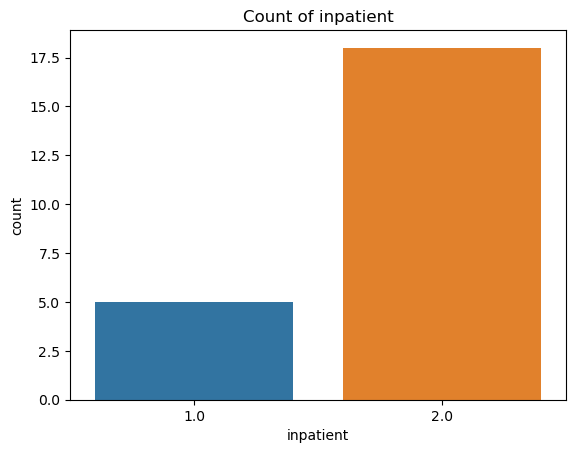

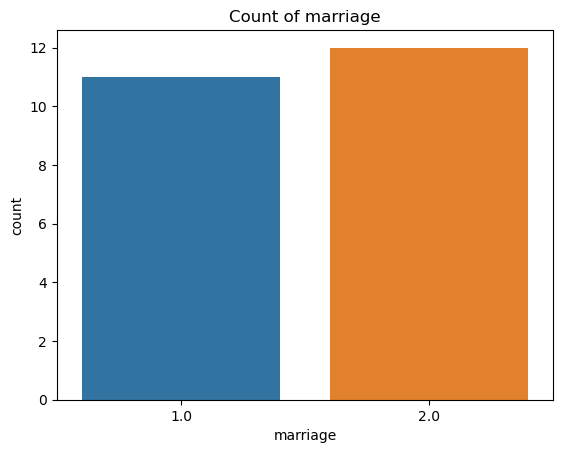

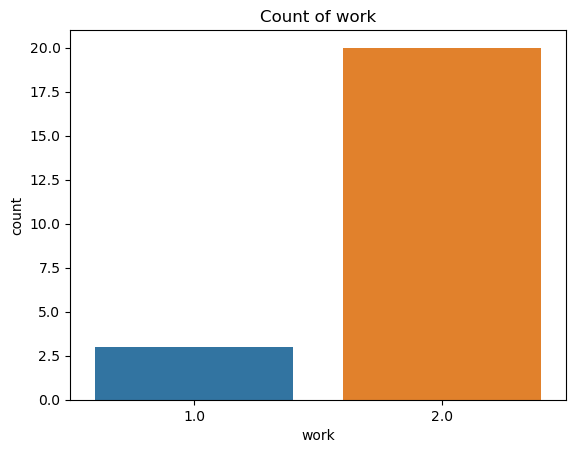

In [24]:
for col in categorical_columns:
    sns.countplot(data=scores_df, x=col)
    plt.title(f'Count of {col}')
    plt.show()


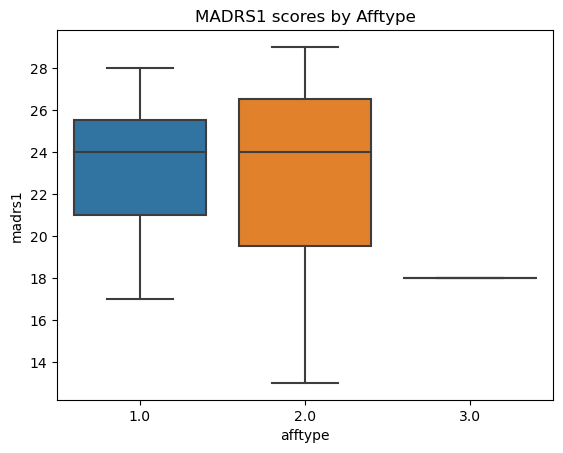

In [25]:
sns.boxplot(data=scores_df, x='afftype', y='madrs1')
plt.title('MADRS1 scores by Afftype')
plt.show()


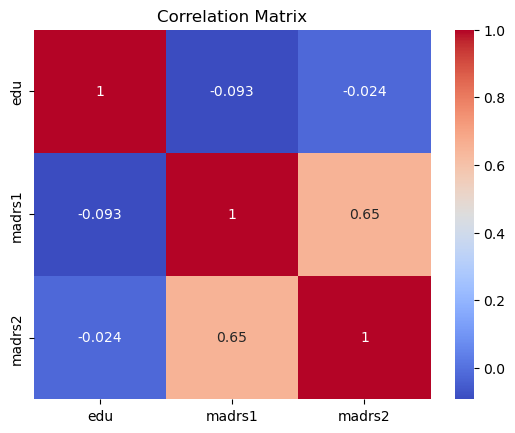

In [26]:
correlation_matrix = scores_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Most common age band: 45-49


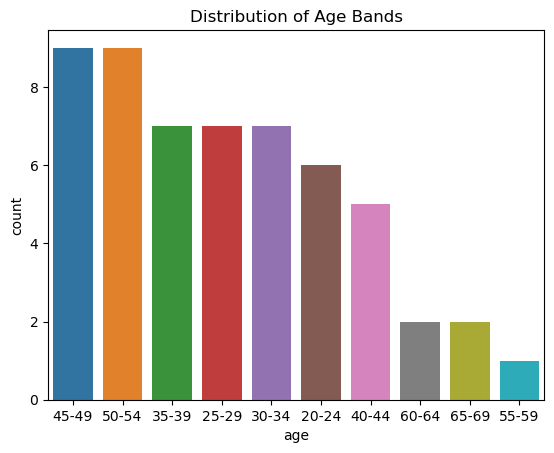

In [27]:
# Count the occurrences of each age band
age_counts = scores_df['age'].value_counts()

# Display the most common age band
print("Most common age band:", age_counts.idxmax())

# Visualize the age bands
sns.countplot(data=scores_df, x='age', order=age_counts.index)
plt.title('Distribution of Age Bands')
plt.show()


Most common age band for divorced/single: 40-44


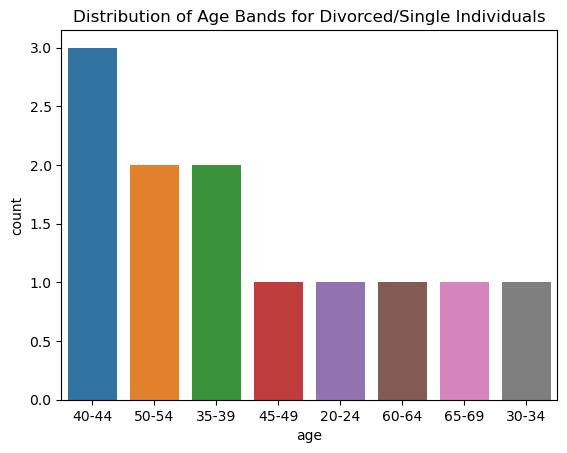

In [29]:
# Filter based on marriage status
divorced_single_df = scores_df[scores_df['marriage'] == 2.0]

# Count the occurrences of each age band in the filtered data
divorced_single_age_counts = divorced_single_df['age'].value_counts()

# Display the most common age band for divorced/single individuals
print("Most common age band for divorced/single:", divorced_single_age_counts.idxmax())

# Visualize the age bands for the filtered data
sns.countplot(data=divorced_single_df, x='age', order=divorced_single_age_counts.index)
plt.title('Distribution of Age Bands for Divorced/Single Individuals')
plt.show()


Most common age band for unemployed: 45-49


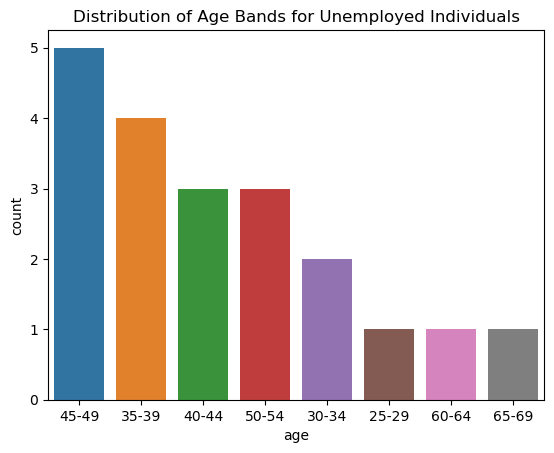

In [30]:
# Filter based on work status
unemployed_df = scores_df[scores_df['work'] == 2.0]

# Count the occurrences of each age band in the filtered data
unemployed_age_counts = unemployed_df['age'].value_counts()

# Display the most common age band for unemployed individuals
print("Most common age band for unemployed:", unemployed_age_counts.idxmax())

# Visualize the age bands for the filtered data
sns.countplot(data=unemployed_df, x='age', order=unemployed_age_counts.index)
plt.title('Distribution of Age Bands for Unemployed Individuals')
plt.show()


The age group 40-44 having the highest number of single and unemployed individuals, despite not being the most frequent age group in the dataset, suggests certain patterns or trends specific to this age group.

The age group 45-49 being the most frequent in the dataset could be due to several reasons, such as:

The dataset might have been collected from a source where the age group 45-49 was the most represented (e.g., a specific survey or study targeting middle-aged individuals).
It might reflect demographic patterns of the population from which the data was sampled.
It could be indicative of certain health, social, or economic factors that are more prevalent or more often studied in the 45-49 age group.

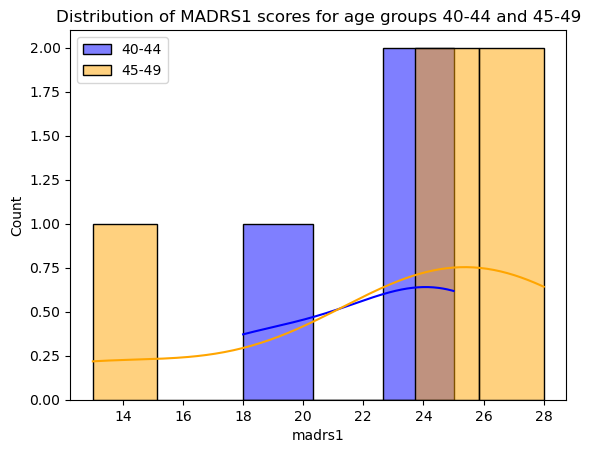

In [32]:
# Filter the dataset for age groups 40-44 and 45-49
age_groups = ['40-44', '45-49']
colors = ['blue', 'orange']

for age_group, color in zip(age_groups, colors):
    subset = scores_df[scores_df['age'] == age_group]
    sns.histplot(subset['madrs1'], kde=True, color=color, label=age_group)

plt.legend()
plt.title('Distribution of MADRS1 scores for age groups 40-44 and 45-49')
plt.show()


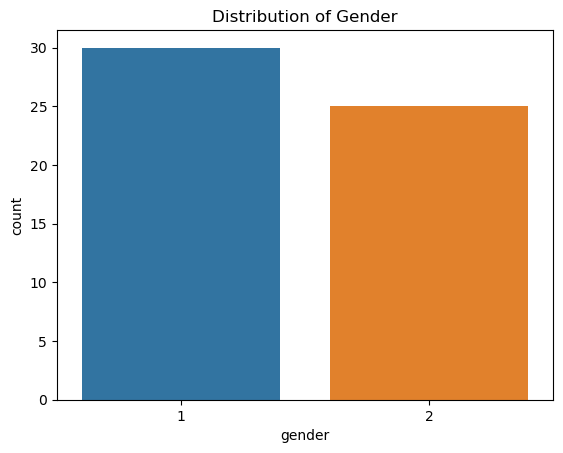

Gender with highest population: 1


In [33]:
# Visualize the gender distribution
sns.countplot(data=scores_df, x='gender')
plt.title('Distribution of Gender')
plt.show()

# Display the gender with the highest count
gender_counts = scores_df['gender'].value_counts()
print("Gender with highest population:", gender_counts.idxmax())


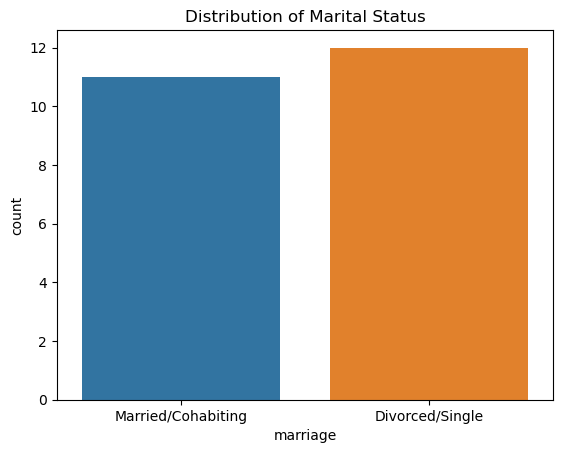

Most common marital status: Divorced/Single


In [35]:
# Filter the dataset for only the desired marital statuses
filtered_marriage_df = scores_df[scores_df['marriage'].isin([1.0, 2.0])]

# Visualize the filtered marriage distribution
sns.countplot(data=filtered_marriage_df, x='marriage')
plt.title('Distribution of Marital Status')
plt.xticks(ticks=[0, 1], labels=["Married/Cohabiting", "Divorced/Single"])
plt.show()

# Display the marital status with the highest count in the filtered data
marriage_counts = filtered_marriage_df['marriage'].value_counts()
most_common_status = "Married/Cohabiting" if marriage_counts.idxmax() == 1.0 else "Divorced/Single"
print(f"Most common marital status: {most_common_status}")


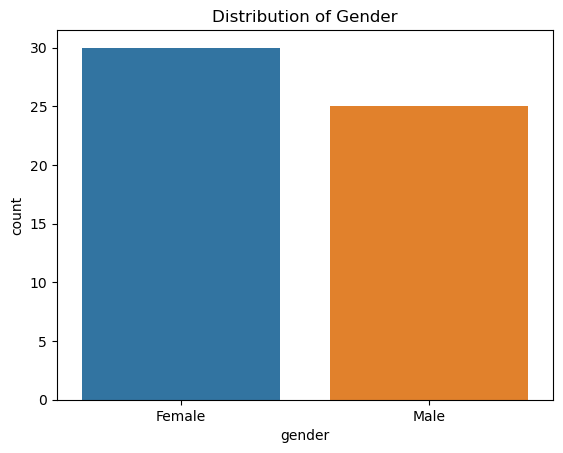

Most common gender: Female


In [36]:
# Visualize the gender distribution
sns.countplot(data=scores_df, x='gender')
plt.title('Distribution of Gender')
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()

# Display the gender with the highest count
gender_counts = scores_df['gender'].value_counts()
most_common_gender = "Female" if gender_counts.idxmax() == 1 else "Male"
print(f"Most common gender: {most_common_gender}")


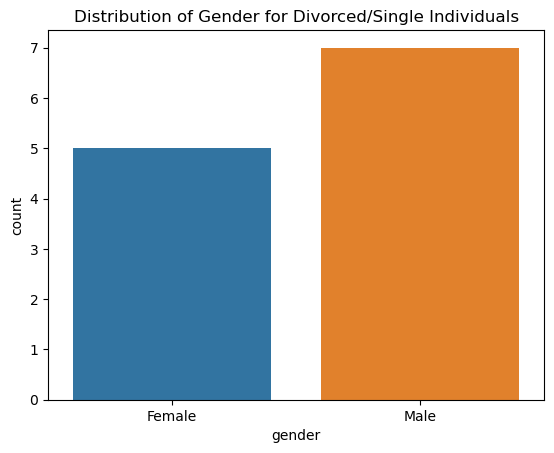

Most common gender for divorced/single: Male


In [37]:
# Filter based on marriage status
divorced_single_df = scores_df[scores_df['marriage'] == 2.0]

# Visualize the gender distribution for divorced/single individuals
sns.countplot(data=divorced_single_df, x='gender')
plt.title('Distribution of Gender for Divorced/Single Individuals')
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()

# Display the most common gender for divorced/single individuals
divorced_single_gender_counts = divorced_single_df['gender'].value_counts()
most_common_gender_divorced_single = "Female" if divorced_single_gender_counts.idxmax() == 1 else "Male"
print(f"Most common gender for divorced/single: {most_common_gender_divorced_single}")


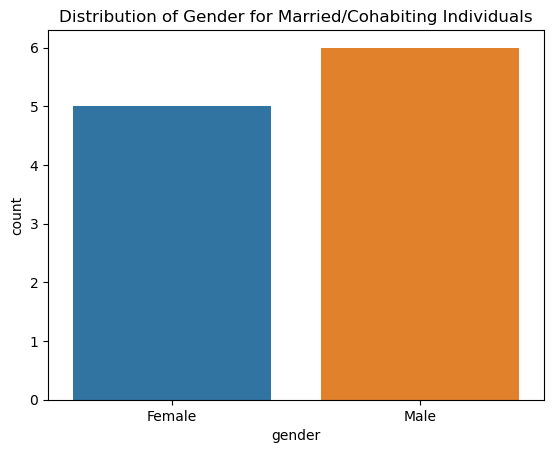

Most common gender for married/cohabiting: Male


In [38]:
# Filter based on marriage status
married_df = scores_df[scores_df['marriage'] == 1.0]

# Visualize the gender distribution for married/cohabiting individuals
sns.countplot(data=married_df, x='gender')
plt.title('Distribution of Gender for Married/Cohabiting Individuals')
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()

# Display the most common gender for married/cohabiting individuals
married_gender_counts = married_df['gender'].value_counts()
most_common_gender_married = "Female" if married_gender_counts.idxmax() == 1 else "Male"
print(f"Most common gender for married/cohabiting: {most_common_gender_married}")
